# Rainfall Australia Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
df = pd.read_csv('weather_aus.csv')

In [2]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Data Cleaning

In [3]:
rainfall_df = df[(df['Rainfall'].notna()) & (df['Evaporation'].notna())  & (df['Cloud9am'].notna()) & (df['Cloud3pm'].notna()) & (df['Humidity9am'].notna()) & (df['Sunshine'].notna()) & (df['Humidity3pm'].notna())].reset_index()
# rainfall_df = rainfall_df[(rainfall_df['Rainfall'] != 0.0)]
rainfall_df = rainfall_df.drop('RainTomorrow', 1)
rainfall_df = rainfall_df.drop('RainToday', 1)
rainfall_df.head()

/tmp/ipykernel_290/223521756.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  rainfall_df = rainfall_df.drop('RainTomorrow', 1)
/tmp/ipykernel_290/223521756.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  rainfall_df = rainfall_df.drop('RainToday', 1)


,index,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,...,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
1,6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,...,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
2,6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,...,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
3,6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,...,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
4,6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,...,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6


In [4]:
rainfall_df['WindSpeed'] = (rainfall_df['WindSpeed9am'] + rainfall_df['WindSpeed3pm'])/2
rainfall_df['Humidity'] = (rainfall_df['Humidity9am'] + rainfall_df['Humidity3pm'])/2
rainfall_df['Pressure'] = (rainfall_df['Pressure9am'] + rainfall_df['Pressure3pm'])/2
rainfall_df['Cloud'] = (rainfall_df['Cloud9am'] + rainfall_df['Cloud3pm'])/2
rainfall_df['AvgTemp'] = (rainfall_df['Temp9am'] + rainfall_df['Temp3pm'])/2
rainfall_df['WGD_ui'] = rainfall_df.groupby(['WindGustDir']).ngroup()
rainfall_df = rainfall_df.drop(columns = ['WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'index', 'Date', 'WindDir9am', 'WindDir3pm'])
rainfall_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,AvgTemp,WGD_ui
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,13.0,16.5,1005.35,3.5,30.00,11
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,19.0,19.0,1012.50,1.0,23.65,8
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,22.5,32.0,1010.75,3.5,31.80,5
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,6.0,29.5,1010.90,3.0,32.35,14
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,15.0,17.0,1009.05,3.5,35.60,14


In [5]:
rainfall_df = rainfall_df[(rainfall_df['WindSpeed'].notna()) & (rainfall_df['Pressure'].notna())]

### Data Analysis

#### Visualizations 

The average rainfall in mms for all Australian cities is:  2.136142364357329


Text(0.5, 1.0, 'Min Temp vs Rainfall')

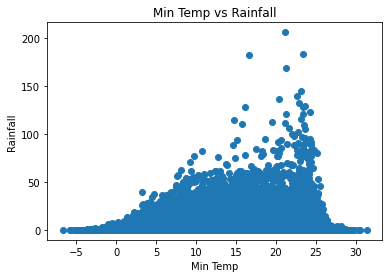

In [6]:
rainfall_list = rainfall_df['Rainfall'].tolist()
min_temp_list = rainfall_df['MinTemp'].tolist()
max_temp_list = rainfall_df['MaxTemp'].tolist()
evaporation_list = rainfall_df['Evaporation'].tolist()
sunshine_list = rainfall_df['Sunshine'].tolist()
wind_gs_list = rainfall_df['WindGustSpeed'].tolist()
wind_speed_list = rainfall_df['WindSpeed'].tolist()
humidity_list = rainfall_df['Humidity'].tolist()
pressure_list = rainfall_df['Pressure'].tolist()
cloud_list = rainfall_df['Cloud'].tolist()
avg_temp_list = rainfall_df['AvgTemp'].tolist()
print("The average rainfall in mms for all Australian cities is: ", np.mean(rainfall_list))
plt.scatter(min_temp_list, rainfall_list)
plt.xlabel('Min Temp')
plt.ylabel('Rainfall')
plt.title("Min Temp vs Rainfall")

Text(0.5, 1.0, 'Max Temp vs Rainfall')

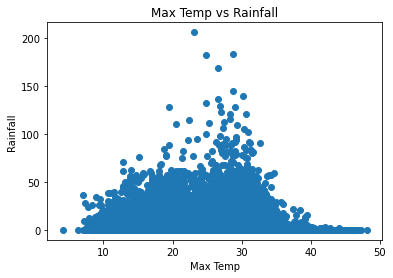

In [7]:
plt.scatter(max_temp_list, rainfall_list)
plt.xlabel('Max Temp')
plt.ylabel('Rainfall')
plt.title("Max Temp vs Rainfall")

Text(0.5, 1.0, 'Evaporation vs Rainfall')

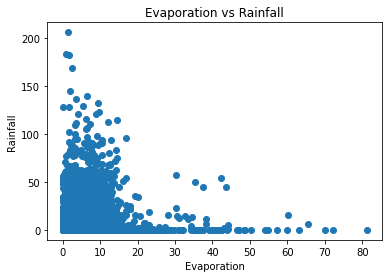

In [8]:
plt.scatter(evaporation_list, rainfall_list)
plt.xlabel('Evaporation')
plt.ylabel('Rainfall')
plt.title("Evaporation vs Rainfall")

Text(0.5, 1.0, 'Sunshine vs Rainfall')

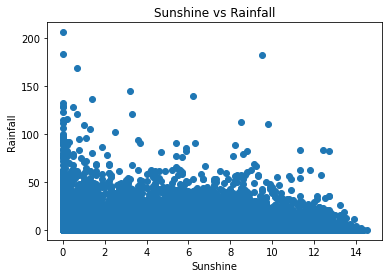

In [9]:
plt.scatter(sunshine_list, rainfall_list)
plt.xlabel('Sunshine')
plt.ylabel('Rainfall')
plt.title("Sunshine vs Rainfall")

Text(0.5, 1.0, 'Wind Gust Speed vs Rainfall')

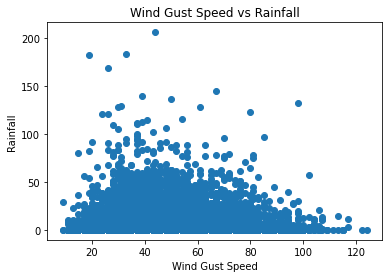

In [10]:
plt.scatter(wind_gs_list, rainfall_list)
plt.xlabel('Wind Gust Speed')
plt.ylabel('Rainfall')
plt.title("Wind Gust Speed vs Rainfall")

Text(0.5, 1.0, 'Wind Speed vs Rainfall')

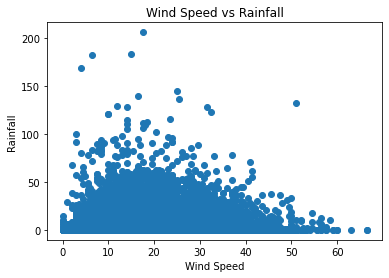

In [11]:
plt.scatter(wind_speed_list, rainfall_list)
plt.xlabel('Wind Speed')
plt.ylabel('Rainfall')
plt.title("Wind Speed vs Rainfall")

Text(0.5, 1.0, 'Humidity vs Rainfall')

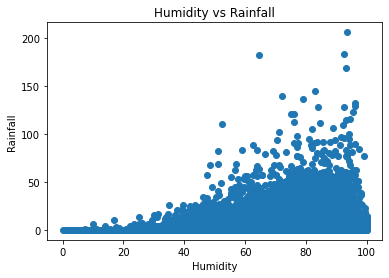

In [12]:
plt.scatter(humidity_list, rainfall_list)
plt.xlabel('Humidity')
plt.ylabel('Rainfall')
plt.title("Humidity vs Rainfall")

Text(0.5, 1.0, 'Pressure vs Rainfall')

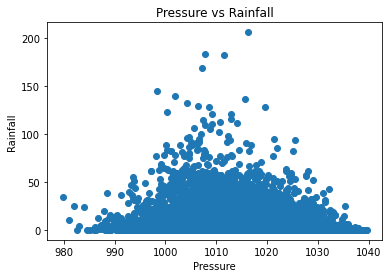

In [13]:
plt.scatter(pressure_list, rainfall_list)
plt.xlabel('Pressure')
plt.ylabel('Rainfall')
plt.title("Pressure vs Rainfall")

Text(0.5, 1.0, 'Cloud vs Rainfall')

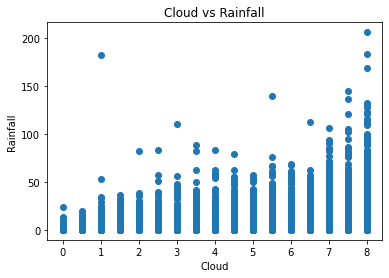

In [14]:
plt.scatter(cloud_list, rainfall_list)
plt.xlabel('Cloud')
plt.ylabel('Rainfall')
plt.title("Cloud vs Rainfall")

Text(0.5, 1.0, 'Avg Temp vs Rainfall')

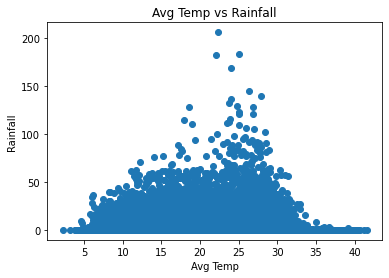

In [15]:
plt.scatter(avg_temp_list, rainfall_list)
plt.xlabel('Avg Temp')
plt.ylabel('Rainfall')
plt.title("Avg Temp vs Rainfall")

In [16]:
#I will be using evaporation, humidity, sunshine, wind speed, and pressure as my features for each unique location
uni_loc_list = list(rainfall_df.Location.unique())
print(type(uni_loc_list))
uni_loc_list.remove('MelbourneAirport')
uni_loc_list.remove('SydneyAirport')
uni_loc_list.remove('PerthAirport')

print("unique locations: ", uni_loc_list)
print("Number of Unique Cities: ", len(uni_loc_list))

<class 'list'>
unique locations:  ['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale', 'Melbourne', 'Mildura', 'Portland', 'Watsonia', 'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Perth', 'Hobart', 'AliceSprings', 'Darwin']
Number of Unique Cities:  24


In [17]:
#getting the specific features for each of the cities...will return a list of lists for and each list consist of feature values for a city
def get_features(key):
    total_feature = []
    temp_rf = rainfall_df.groupby('Location')
    for i in range(len(uni_loc_list)):
        ret_list = []
        cur_val = uni_loc_list[i]
        new_rf = temp_rf.get_group(cur_val)
        ret_list = new_rf[key].tolist()
        total_feature.append(ret_list)
    return total_feature

def rand_locations():
    idx = randrange(len(uni_loc_list))
    return idx

rainfall_per_location = get_features('Rainfall')

humidity_per_location = get_features('Humidity')
sunshine_per_location = get_features('Sunshine')
evaporation_per_location = get_features('Evaporation')
windspeed_per_location = get_features('WindSpeed')
pressure_per_location = get_features('Pressure')

cur_location_idx = rand_locations()
my_location = uni_loc_list[cur_location_idx]

print("random index: ", cur_location_idx)
print("random location: ", my_location)

random index:  9
random location:  Melbourne


In [18]:
#getting the averages for the specific features for each location
def get_averages(featureA_list):
    means = []
    for i in range(len(featureA_list)):
        cur_mean = 0
        cur = featureA_list[i]
        cur_mean = np.mean(cur)
        means.append(cur_mean)
    return means

avg_humidities = get_averages(humidity_per_location)
avg_sunshine = get_averages(sunshine_per_location)
avg_evap = get_averages(evaporation_per_location)
avg_windspeeds = get_averages(windspeed_per_location)
avg_pressures = get_averages(pressure_per_location)

avg_rainfalls = get_averages(rainfall_per_location)

all_features = []

#getting all of the features (evaporation, humidity, etc..) for a specific location, will perform KNN based on all_features
for i in range(len(avg_humidities)):
    cur_location = []
    cur_location.append(avg_humidities[i])
    cur_location.append(avg_sunshine[i])
    cur_location.append(avg_evap[i])
    cur_location.append(avg_windspeeds[i])
    cur_location.append(avg_pressures[i])
    all_features.append(cur_location)

In [19]:
#computing cosine similarity...will use this to determine the nearest neighbors
def squared_sum(listI):
    new = []
    for i in range(len(listI)):
        cur_val = listI[i]
        new_val = cur_val ** 2
        new.append(new_val)
        
    return sum(new)
    
def cosine_similarity(listC, listD):
    if len(listC) > len(listD):
        listD = padding(listD, len(listD), len(listC))
        
    if len(listD) > len(listC):
        listC = padding(listC, len(listC), len(listD))  
    
    sum1 = squared_sum(listC)
    sum2 = squared_sum(listD)

    sqrt1 = np.sqrt(sum1)
    sqrt2 = np.sqrt(sum2)
    
    denominator = sqrt1 * sqrt2
    
    numerator = np.dot(listC, listD)
    ret = numerator/denominator
    return ret

In [20]:
def KNN(k, cur_location_idx, locs, feature_values):
    sims = [] # will be used to compute the weighted averages
    cosine_dist = []
    top_k = []
    dist_list = []
    results = []
    
    my_feature = feature_values[cur_location_idx]
    for i in range(len(feature_values)):
        if feature_values[i] != my_feature:
            dist = 1 - cosine_similarity(my_feature, feature_values[i]) #using cosine distance to determine which featurs are the closest to the current feature
            cosine_dist.append(dist)
                    
    for i in range(k):
        closest = min(cosine_dist)
        sims.append(abs(1-min(cosine_dist))) #getting the similarities for each of the closest neighbors
        closest_idx = cosine_dist.index(closest)
        closest_feature = locs[closest_idx]
        top_k.append(closest_feature)
        cosine_dist[closest_idx] = np.inf
        
    results.append(top_k)
    results.append(sims)
    return results
knn_result = KNN(3, cur_location_idx, uni_loc_list, all_features)
print("Most Similar Cities: ", knn_result[0])

Most Similar Cities:  ['Perth', 'Sydney', 'Cairns']


In [21]:
#getting the weighted average by computing the 
def weighted_average(knn_result):
    wa_list = []
    final = 0
    closest_cities = knn_result[0]
    simils = knn_result[1]
    sim_sum = sum(simils)
    for i in range(len(closest_cities)):
        cur_city = closest_cities[i]
        cur_city_idx = uni_loc_list.index(cur_city)
        cur_city_rfvals = avg_rainfalls[cur_city_idx]
        mn = np.mean(cur_city_rfvals)
        w_mn = mn * simils[i] #similarity times average rainfall for a particular city
        wa_list.append(w_mn)
        
    numerator = sum(wa_list)
    final = numerator/sim_sum
    return final
# print(avg_rainfalls)
prediction = weighted_average(knn_result)
print("The amount of predicted rainfall for the city ", my_location, " is: ", prediction)

The amount of predicted rainfall for the city  Melbourne  is:  3.0934923249718116


## Visualization Creation for Predicted Value (unnormalized)

In [22]:
#how does the predicted rainfall amount compare with the rainfall statistics for the city (for the specific features)
cur_rainfall = rainfall_per_location[cur_location_idx]
cur_rainfall.append(prediction)

avg_humidity_value = avg_humidities[cur_location_idx]
avg_sunshine_value = avg_sunshine[cur_location_idx]
avg_evap_value = avg_evap[cur_location_idx]

cur_humidity = humidity_per_location[cur_location_idx]
cur_sunshine = sunshine_per_location[cur_location_idx]
cur_evap = evaporation_per_location[cur_location_idx]

print("humidity before: ", len(cur_humidity))

cur_humidity.append(avg_humidity_value)
cur_sunshine.append(avg_sunshine_value)
cur_evap.append(avg_evap_value)

print("humidity after: ", len(cur_humidity))
print("rainfall after: ", len(cur_rainfall))
# plt.scatter(cur_humidity, cur_rainfall)

humidity before:  2066
humidity after:  2067
rainfall after:  2067


In [23]:
cols = []
for i in range(len(cur_rainfall)):
    if cur_rainfall[i] == prediction:
        cols.append('Red')
    else:
        cols.append('Blue')

Text(0.5, 1.0, 'Humidity vs Rainfall for City')

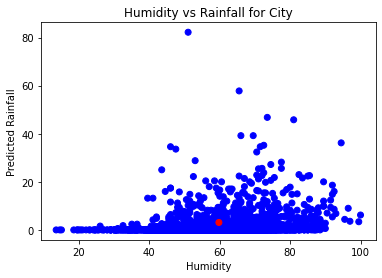

In [24]:
plt.scatter(cur_humidity, cur_rainfall, c = cols)
plt.xlabel('Humidity')
plt.ylabel('Predicted Rainfall')
plt.title("Humidity vs Rainfall for City")

Text(0.5, 1.0, 'Sunshine vs Rainfall for City')

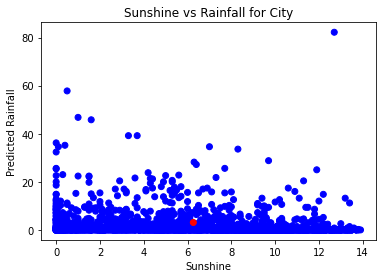

In [25]:
plt.scatter(cur_sunshine, cur_rainfall, c = cols)
plt.xlabel('Sunshine')
plt.ylabel('Predicted Rainfall')
plt.title("Sunshine vs Rainfall for City")

Text(0.5, 1.0, 'Evaporation vs Rainfall for City')

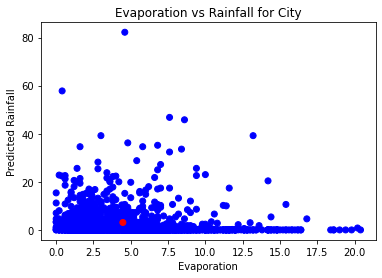

In [26]:
plt.scatter(cur_evap, cur_rainfall, c = cols)
plt.xlabel('Evaporation')
plt.ylabel('Predicted Rainfall')
plt.title("Evaporation vs Rainfall for City")

## Attempting Normalization

In [27]:
#trying to improve accuracy with normnalized df
normalized_df = pd.DataFrame()
normalized_df['Rainfall'] = avg_humidities
normalized_df['Humidity'] = avg_humidities
normalized_df['Sunshine'] = avg_sunshine
normalized_df['Evaporation'] = avg_evap   
normalized_df['WindSpeed'] = avg_windspeeds
normalized_df['Pressure'] = avg_pressures
normalized_df=(normalized_df-normalized_df.min())/(normalized_df.max()-normalized_df.min()) #will get everythign between 0 and 1
normalized_df.head()

,Rainfall,Humidity,Sunshine,Evaporation,WindSpeed,Pressure
0,0.326177,0.326177,0.758042,0.558050,0.370621,0.824911
1,0.785209,0.785209,0.412106,0.105471,0.754650,0.884232
2,0.397126,0.397126,0.812283,0.715513,0.681405,0.835887
3,0.894217,0.894217,0.301254,0.220658,1.000000,0.876742
4,0.691214,0.691214,0.379063,0.329546,0.660361,0.936622


In [28]:
#applying KNN on the normalized values (not expecting much to change)
norm_avg_rainfalls = normalized_df['Rainfall'].tolist()
norm_avg_humidities = normalized_df['Humidity'].tolist()
norm_avg_sunshines = normalized_df['Sunshine'].tolist()
norm_avg_evaps = normalized_df['Evaporation'].tolist()
norm_avg_windspeeds = normalized_df['WindSpeed'].tolist()
norm_avg_pressures = normalized_df['Pressure'].tolist()

# #getting all of the features for a specific location, will perform KNN based on all_features
norm_all_features = []
for i in range(len(avg_humidities)):
    cur_location2 = []
    cur_location2.append(norm_avg_humidities[i])
    cur_location2.append(norm_avg_sunshines[i])
    cur_location2.append(norm_avg_evaps[i])
    cur_location2.append(norm_avg_windspeeds[i])
    cur_location2.append(norm_avg_pressures[i])
    norm_all_features.append(cur_location2)

knn_result2 = KNN(3, cur_location_idx, uni_loc_list, norm_all_features)
norm_prediction = weighted_average(knn_result2)
print("The normalized prediction is: ", norm_prediction)

The normalized prediction is:  1.950256914605005


## Results

In this section, I will try to analyze some of the significiant patterns that are associated with rainfall. Instead of random predictions, I will analyze the rainfall for all of the unique cities. 

In [29]:
def percent_error(got, expected):
    abs_val = abs(got - expected)
    pe = abs_val/expected * 100
    return pe

In [30]:
predictions = []
norm_predictions = []

for i in range(len(uni_loc_list)):
    knn_result = KNN(3, i, uni_loc_list, all_features)
    norm_knn_result = KNN(3, i, uni_loc_list, norm_all_features)
    city_rainfall = weighted_average(knn_result)
    city_rainfall_norm = weighted_average(norm_knn_result)
    norm_predictions.append(city_rainfall_norm)
    predictions.append(city_rainfall)
    
max_city_idx = predictions.index(max(predictions))
min_city_idx = predictions.index(min(predictions))

max_city_idx_norm = norm_predictions.index(max(norm_predictions))
min_city_idx_norm = norm_predictions.index(min(norm_predictions))

max_city = uni_loc_list[max_city_idx]
min_city = uni_loc_list[min_city_idx]

max_city_norm = uni_loc_list[max_city_idx_norm]
min_city_norm = uni_loc_list[min_city_idx_norm]

print("The city with the most rainfall: ", max_city)
print("The city with the least rainfall: ", min_city) #Alice Springs should have the lowest rainfall, as it has a desert climate

print("The city with the most rainfall using normalized prediction: ", max_city_norm)
print("The city with the least rainfall using normalized prediction: ", min_city_norm)     




The city with the most rainfall:  MountGambier
The city with the least rainfall:  AliceSprings
The city with the most rainfall using normalized prediction:  Williamtown
The city with the least rainfall using normalized prediction:  AliceSprings


In [31]:
print(len(avg_rainfalls))
print(len(predictions))
print(len(norm_predictions))

24
24
24


In [32]:
errors = []
norm_errors = []
for i in range(len(avg_rainfalls)):
    error = percent_error(predictions[i], avg_rainfalls[i])
    norm_error = percent_error(norm_predictions[i], avg_rainfalls[i])
    errors.append(error)
    norm_errors.append(norm_error)
    
print("Percent error for non normalized implementation: ", np.mean(errors))
print("Percent error for normalized implementation: ", np.mean(norm_errors))

Percent error for non normalized implementation:  42.07166219358083
Percent error for normalized implementation:  40.76007532145208


Text(0, 0.5, 'Error Percentage')

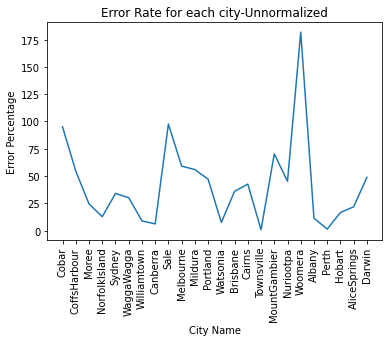

In [33]:
plt.plot(uni_loc_list, errors)
plt.xticks(rotation = 90)
plt.title("Error Rate for each city-Unnormalized")
plt.xlabel("City Name")
plt.ylabel("Error Percentage")

Text(0, 0.5, 'Error Percentage')

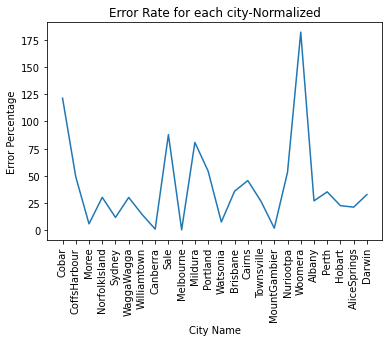

In [34]:
plt.plot(uni_loc_list, norm_errors)
plt.xticks(rotation = 90)
plt.title("Error Rate for each city-Normalized")
plt.xlabel("City Name")
plt.ylabel("Error Percentage")

## Prediction Summarization

In [35]:
print("The average amount of rainfall for unnormalized: ", np.mean(predictions))
print("The average amount of rainfall for normalized: ", np.mean(norm_predictions))
print("The average amount of rainfall orginally: ", np.mean(rainfall_list))

The average amount of rainfall for unnormalized:  2.0772098005371777
The average amount of rainfall for normalized:  1.9762841321956663
The average amount of rainfall orginally:  2.136142364357329


Text(0, 0.5, 'Rainfall Amount')

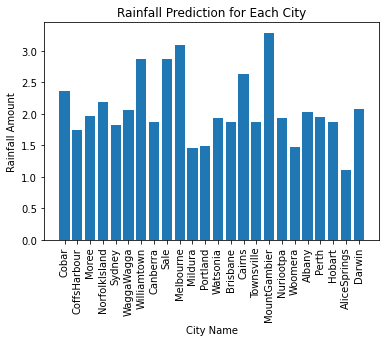

In [36]:
plt.bar(uni_loc_list, predictions)
plt.xticks(rotation = 90)
plt.title("Rainfall Prediction for Each City")
plt.xlabel("City Name")
plt.ylabel("Rainfall Amount")

Text(0, 0.5, 'Rainfall Amount')

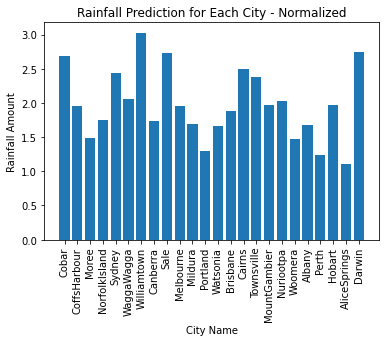

In [37]:
plt.bar(uni_loc_list, norm_predictions)
plt.xticks(rotation = 90)
plt.title("Rainfall Prediction for Each City - Normalized")
plt.xlabel("City Name")
plt.ylabel("Rainfall Amount")

Resources: https://stackoverflow.com/questions/37564656/how-to-apply-get-group-to-groupby-data-in-pandas-when-the-groupby-column-is-a-ca and lecture notes